In [1]:
import gensim
import numpy as np
import spacy
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import re

%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data = pd.read_csv("australianBC_news.csv")

In [3]:
data.head()

,publish_date,headline_text
0,20030301,30 million landmines destroyed worldwide
1,20030301,adelaide international film festival kicks off
2,20030301,airpark planned for port douglas
3,20030301,alinghi march delayed by postponement
4,20030301,alinghi poised for historic win


In [4]:
df = data['headline_text'].values.tolist()

In [5]:
#Some Preprocessing of sentences

df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]

df = [re.sub('\s+', ' ', sent) for sent in df]

df = [re.sub("\'", "", sent) for sent in df]

df = [re.sub("-", " ", sent) for sent in df]

df = [re.sub(":", "", sent) for sent in df]

In [7]:
df[:3]

['30 million landmines destroyed worldwide',
 'adelaide international film festival kicks off',
 'airpark planned for port douglas']

In [8]:
#Create nlp pipeline
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm") 

In [ ]:
## Add custome stopwords, contraction to the existing stopwords list

In [9]:
cust_stop= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']

In [10]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how ishow does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [11]:
my_stop_words = []

#add stopwords from contractions dictionary
for key, value in contractions.items():
    my_stop_words.append(key)

#Add stopwords from custome stopword list    
for item in cust_stop:
    my_stop_words.append(item)

#Add the stopwords to pipeline    
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True 

In [13]:
#Remove stopwords punctuations lower the sentences and lemmatize it to tokens
def preprocess(text):
    doc=nlp(str(text).lower())
    return [w.lemma_ for w in doc if not w.is_stop and not w.is_punct]

In [14]:
preprocessed_text=[]
for item in df:
    preprocessed_text.append(preprocess(item))

In [15]:
preprocessed_text[:3]

[['30', 'million', 'landmine', 'destroy', 'worldwide'],
 ['adelaide', 'international', 'film', 'festival', 'kick'],
 ['airpark', 'plan', 'port', 'douglas']]

In [16]:
#Create bigrams
bigram = gensim.models.Phrases(preprocessed_text, min_count=2, threshold=50) #higher threshold fewer phrases.
final_text = [bigram[sentence] for sentence in preprocessed_text]

In [17]:
final_text[:3]

[['30', 'million', 'landmine', 'destroy', 'worldwide'],
 ['adelaide', 'international', 'film', 'festival', 'kick'],
 ['airpark', 'plan', 'port', 'douglas']]

In [18]:
#Create dictionary and corpus
dictionary = Dictionary(final_text)
corpus = [dictionary.doc2bow(sentence) for sentence in final_text]

In [19]:
corpus[:3]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1)]]

In [20]:
#Convert it into tfidf vectors
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [43]:
import os
#path_lda_millet='~/mallet_2/bin/mallet'

from gensim.models import LdaModel
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        #model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_model)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [50]:
from gensim.models.coherencemodel import CoherenceModel

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=final_text, limit=40, start=2, step=3)



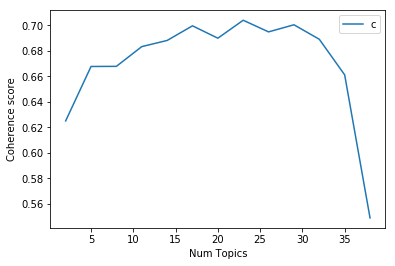

In [51]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
limit=40; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [52]:
#Print max coherence value to number of topics
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4)) #The higher the better

Num Topics = 2  has Coherence Value of 0.625
Num Topics = 5  has Coherence Value of 0.6677
Num Topics = 8  has Coherence Value of 0.6678
Num Topics = 11  has Coherence Value of 0.6833
Num Topics = 14  has Coherence Value of 0.6881
Num Topics = 17  has Coherence Value of 0.6996
Num Topics = 20  has Coherence Value of 0.6899
Num Topics = 23  has Coherence Value of 0.704
Num Topics = 26  has Coherence Value of 0.6948
Num Topics = 29  has Coherence Value of 0.7004
Num Topics = 32  has Coherence Value of 0.689
Num Topics = 35  has Coherence Value of 0.6611
Num Topics = 38  has Coherence Value of 0.5489


In [53]:
item_iter=2
for model in model_list:
    print("Num Topics =",item_iter," has perplexity of", round(model.log_perplexity(corpus_tfidf),4)) #The lower the better
    item_iter+=3
    

Num Topics = 2  has perplexity of -9.231
Num Topics = 5  has perplexity of -10.1531
Num Topics = 8  has perplexity of -10.8592
Num Topics = 11  has perplexity of -12.2685
Num Topics = 14  has perplexity of -13.4914
Num Topics = 17  has perplexity of -14.3555
Num Topics = 20  has perplexity of -15.2074
Num Topics = 23  has perplexity of -16.0852
Num Topics = 26  has perplexity of -16.9151
Num Topics = 29  has perplexity of -17.9587
Num Topics = 32  has perplexity of -19.9265
Num Topics = 35  has perplexity of -24.1847
Num Topics = 38  has perplexity of -33.8225


In [54]:
#Create optimal ldamodel with number of topics 23 as input
optimal_ldamodel = LdaModel(corpus=corpus_tfidf, num_topics=23, id2word=dictionary, minimum_probability=0)

In [58]:
optimal_ldamodel.show_topics(23)

[(0,
  '0.017*"tv" + 0.016*"help" + 0.016*"iraqi" + 0.014*"phillip_island" + 0.013*"upset" + 0.012*"need" + 0.011*"host" + 0.011*"year" + 0.011*"tasmanian" + 0.010*"title"'),
 (1,
  '0.026*"tough" + 0.022*"fight" + 0.017*"world_cup" + 0.014*"violence" + 0.013*"spirit" + 0.012*"ahead" + 0.012*"strategy" + 0.012*"north_coast" + 0.012*"agassi" + 0.012*"tear"'),
 (2,
  '0.028*"take" + 0.022*"power" + 0.019*"glory" + 0.018*"start" + 0.015*"oppn" + 0.015*"rain" + 0.013*"flight" + 0.013*"hodgson" + 0.013*"thriller" + 0.012*"stage"'),
 (3,
  '0.031*"soldier" + 0.024*"death" + 0.018*"critical" + 0.017*"poll" + 0.014*"end" + 0.011*"stand" + 0.011*"marine" + 0.011*"kill" + 0.010*"predict" + 0.010*"appeal"'),
 (4,
  '0.022*"journalist" + 0.018*"stab" + 0.016*"kill" + 0.015*"anzac" + 0.014*"spark" + 0.014*"die" + 0.013*"turkey" + 0.013*"iraq" + 0.013*"health" + 0.012*"coalition"'),
 (5,
  '0.034*"iraqis" + 0.021*"confident" + 0.018*"housing" + 0.016*"step" + 0.014*"seal" + 0.013*"put" + 0.013*"key"

In [62]:
#Naming the topics for LDA
import re
def naming_topics(sentence):
    regex = re.compile('[^a-zA-Z]')
    sent=regex.sub(' ', sentence)
    pattern = re.compile(r'\s+') 
    output=re.sub(pattern, ' ', sent)
    name="_".join(output.strip().split(" ")[:5])
    return name.capitalize()

In [78]:
topic_names={}
for i in range(len(optimal_ldamodel.show_topics(23))):
    topic_names[str(float(i))]=naming_topics(optimal_ldamodel.show_topics(23)[i][1])

In [79]:
topic_names

{'0.0': 'Tv_help_iraqi_phillip_island',
 '1.0': 'Tough_fight_world_cup_violence',
 '2.0': 'Take_power_glory_start_oppn',
 '3.0': 'Soldier_death_critical_poll_end',
 '4.0': 'Journalist_stab_kill_anzac_spark',
 '5.0': 'Iraqis_confident_housing_step_seal',
 '6.0': 'Storm_long_target_damage_ahead',
 '7.0': 'Grant_celebrate_ask_vote_insurance',
 '8.0': 'Protest_war_australian_praise_fear',
 '9.0': 'Official_raid_fine_kill_killer',
 '10.0': 'Man_melbourne_charge_close_near',
 '11.0': 'Virus_bombing_minister_urge_hit',
 '12.0': 'Injure_ground_pay_collapse_gold',
 '13.0': 'England_northern_leadership_flu_supply',
 '14.0': 'Southern_school_oil_family_fall',
 '15.0': 'Treatment_country_fuel_assault_law',
 '16.0': 'Miss_post_zimbabwe_evidence_show',
 '17.0': 'General_truck_welcome_deployment_well',
 '18.0': 'Liberal_bomb_upgrade_battle_helicopter',
 '19.0': 'Protester_israel_threaten_aid_anti',
 '20.0': 'Troop_saddam_iraq_air_death',
 '21.0': 'Uk_rumsfeld_cut_child_dead',
 '22.0': 'Doctor_suicide

In [67]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
   
    sent_topics_df = pd.DataFrame()

   
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -- dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
    

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_ldamodel, corpus=corpus_tfidf, texts=df)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,22.0,0.7029,"doctor, suicide, kuwait, iraqi, public, shark,...",30 million landmines destroyed worldwide
1,1,21.0,0.3154,"uk, rumsfeld, cut, child, dead, blast, plane, ...",adelaide international film festival kicks off
2,2,10.0,0.6663,"man, melbourne, charge, close, near, fatal, mu...",airpark planned for port douglas
3,3,14.0,0.5138,"southern, school, oil, family, fall, hand, sau...",alinghi march delayed by postponement
4,4,17.0,0.5441,"general, truck, welcome, deployment, well, roc...",alinghi poised for historic win


In [80]:
topics_no=df_dominant_topic['Dominant_Topic'].values

In [81]:
Dominant_Topic_names=[]
for items in topics_no:
    Dominant_Topic_names.append(topic_names[str(items)])

In [82]:
df_dominant_topic['Document_No']=Dominant_Topic_names

In [83]:
df_dominant_topic.sample(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
6185,Storm_long_target_damage_ahead,6.0,0.1960,"storm, long, target, damage, ahead, townsville...",ageing hearing in melbourne today
2958,Take_power_glory_start_oppn,2.0,0.3343,"take, power, glory, start, oppn, rain, flight,...",sa road toll up on previous year
2822,Iraqis_confident_housing_step_seal,5.0,0.4597,"iraqis, confident, housing, step, seal, put, k...",super reforms will not be compromised govt
2835,Tough_fight_world_cup_violence,1.0,0.1918,"tough, fight, world_cup, violence, spirit, ahe...",united counting on euro pressure to get gunners
5998,Soldier_death_critical_poll_end,3.0,0.3665,"soldier, death, critical, poll, end, stand, ma...",cwealth stands by its accc man samuel
3009,Iraqis_confident_housing_step_seal,5.0,0.4387,"iraqis, confident, housing, step, seal, put, k...",blix to consult un over iraqi invitation
3346,Uk_rumsfeld_cut_child_dead,21.0,0.3239,"uk, rumsfeld, cut, child, dead, blast, plane, ...",athens games not affected by iraq crisis minister
1639,Tough_fight_world_cup_violence,1.0,0.5795,"tough, fight, world_cup, violence, spirit, ahe...",howard plays down prospect of capital punishment
5859,Soldier_death_critical_poll_end,3.0,0.2863,"soldier, death, critical, poll, end, stand, ma...",marines missing after nasiriyah fighting
4335,Tv_help_iraqi_phillip_island,0.0,0.3472,"tv, help, iraqi, phillip_island, upset, need, ...",paton takes first aust champs title


In [85]:
df_dominant_topic.to_csv('News_Data_Topic_Model.csv', index=False)